In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle as pickle
from unyt import g,cm
from numpy.linalg import eig
import math

In [3]:
with open("value_total.pkl",'rb') as f:
    value = pickle.load(f)
with open("lyman_cul.pkl",'rb') as f:
    integral_value = pickle.load(f)
data =[]
for i,k in zip(integral_value, value):
    data.append([i,k])
data.sort()

In [4]:
with open('peak_locations_box_c.pkl', 'rb') as f:
    peaks = pickle.load(f)

In [5]:
for i in range(len(peaks)):
    for z in peaks[i]:
        if (z<.03 or z>39.97):
            print(i)

1
457
583
705
706
1067
1262
1317
1371
1454
1577
1774
1885
1937
2042
2131
2141
2197
2490
2491
2604
2638
2685
2806


In [6]:
len(peaks)

2895

In [7]:
def min_max_mid(value):
    min_values = []
    max_values = []
    mid_values = []
    array = []
    for i in value:
        array = []
        min_values.append(min(i[0]))
        max_values.append(max(i[0]))
        array.append(i[0])
        array[0].sort()
        mid_values.append(array[0][1])
    return min_values,max_values,mid_values


In [8]:
def seperation_data(data):
    bins = []
    min = 1.6022738131189712e+16; max = 6.04643739275747e+21
    bins = 10**np.linspace(np.log10(min),np.log10(max),6)
    _16_17 = []
    for i in data:
        if i[0]<bins[1]:
            _16_17.append(i[1])
    _17_18 = []
    for i in data:
        if bins[1]<i[0]<bins[2]:
            _17_18.append(i[1])
    _18_19 = []
    for i in data:
        if bins[2]<i[0]<bins[3]:
            _18_19.append(i[1])
    _19_20 = []
    for i in data:
        if bins[3]<i[0]<bins[4]:
            _19_20.append(i[1])
    _20_21 = []
    for i in data:
        if bins[4]<i[0]<bins[5]:
            _20_21.append(i[1])
    return _16_17, _17_18, _18_19, _19_20, _20_21

In [9]:
_16_17, _17_18, _18_19, _19_20, _20_21 = seperation_data(data)

In [10]:
min_values,max_values,mid_values = min_max_mid(value)

In [11]:
remove = np.loadtxt('remove.raw', skiprows=0)

In [27]:
ratio = np.divide(max_values,min_values)
print(len(ratio))
for i in range(len(ratio)):
    if(30<ratio[i]<35):
        print(i)

2895
744


In [28]:
len(ratio)

2895

In [13]:
ratio[279]

6.065581230326913

Text(0, 0.5, 'number counts')

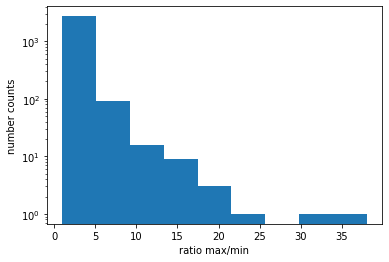

In [14]:
ratio = np.divide(max_values,min_values)

for i in reversed(range(len(remove))):
    ratio[int(remove[i])] = ratio[-1]
    ratio = ratio[:-1]
total_ratio = sum(ratio)

start,stop =math.floor(min(ratio)), math.ceil(max(ratio))
bins = np.linspace(start,stop,10)

total,x,_ = plt.hist(ratio, bins=bins)
plt.yscale("log")
plt.xlabel("ratio max/min")
plt.ylabel("number counts")

Text(0, 0.5, 'number counts percentage')

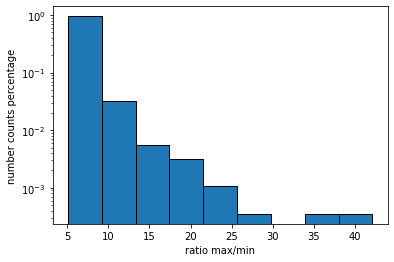

In [15]:
width = np.diff(x)
freq = total / float(sum(total))
plt.bar(x[1:], freq, width=width, align="edge", ec="k")
plt.yscale("log")
plt.xlabel("ratio max/min")
plt.ylabel("number counts percentage")

2895


Text(0, 0.5, 'number counts')

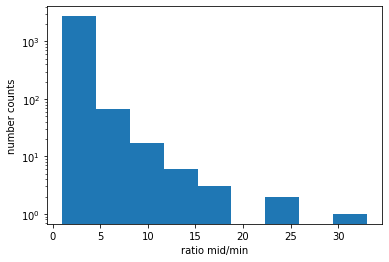

In [16]:
ratio = np.divide(mid_values,min_values)
print(len(ratio))
for i in reversed(range(len(remove))):
    ratio[int(remove[i])] = ratio[-1]
    ratio = ratio[:-1]
start,stop =math.floor(min(ratio)), math.ceil(max(ratio))
bins = np.linspace(start,stop,10)
total,x,_ = plt.hist(ratio,bins=bins)
plt.xlabel("ratio mid/min")
plt.yscale("log")
plt.ylabel("number counts")

Text(0, 0.5, 'number counts percentage')

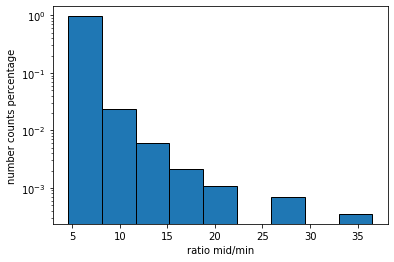

In [17]:
width = np.diff(x)
freq = total / float(sum(total))
plt.bar(x[1:], freq, width=width, align="edge", ec="k")
plt.yscale("log")
plt.xlabel("ratio mid/min")
plt.ylabel("number counts percentage")

In [18]:
bin_centers = 0.5*(x[1:]+x[:-1])

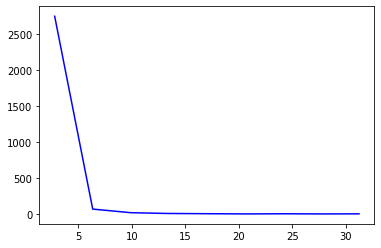

In [19]:
plt.plot(bin_centers,total,c ="blue",label = "19-20")

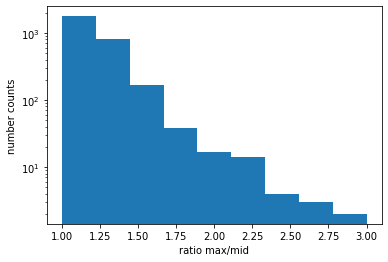

In [20]:
ratio = np.divide(max_values,mid_values)
for i in reversed(range(len(remove))):
    ratio[int(remove[i])] = ratio[-1]
    ratio = ratio[:-1]
start,stop =math.floor(min(ratio)), math.ceil(max(ratio))
bins = np.linspace(start,stop,10)
total,x,_ = plt.hist(ratio,bins=bins)
plt.xlabel("ratio max/mid")
plt.ylabel("number counts") 
plt.yscale("log")

Text(0, 0.5, 'number counts percentage')

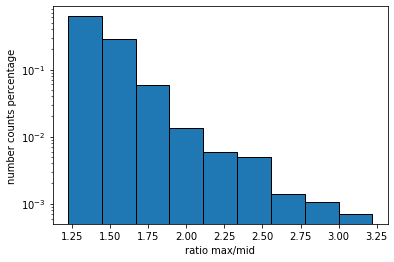

In [21]:
width = np.diff(x)
freq = total / float(sum(total))
plt.bar(x[1:], freq, width=width, align="edge", ec="k")
plt.yscale("log")
plt.xlabel("ratio max/mid")
plt.ylabel("number counts percentage")

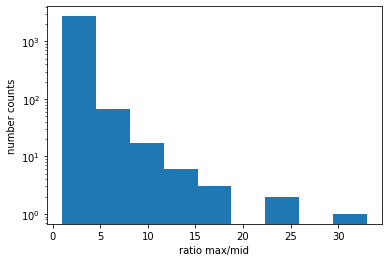

In [22]:
ratio = np.divide(mid_values,min_values)
for i in reversed(range(len(remove))):
    ratio[int(remove[i])] = ratio[-1]
    ratio = ratio[:-1]
start,stop =math.floor(min(ratio)), math.ceil(max(ratio))
bins = np.linspace(start,stop,10)
total,x,_ = plt.hist(ratio,bins=bins)
plt.xlabel("ratio max/mid")
plt.ylabel("number counts") 
plt.yscale("log")

Text(0, 0.5, 'number counts percentage')

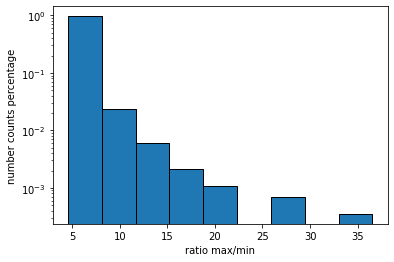

In [23]:
width = np.diff(x)
freq = total / float(sum(total))
plt.bar(x[1:], freq, width=width, align="edge", ec="k")
plt.yscale("log")
plt.xlabel("ratio max/min")
plt.ylabel("number counts percentage")

In [24]:
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,total1,c ="blue")

NameError: name 'total1' is not defined

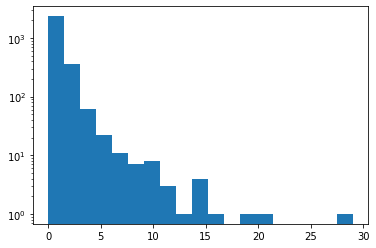

In [ ]:
difference = ratio/ratio1
start,stop =math.floor(min(difference)), math.ceil(max(difference))
bins = np.linspace(start,stop,20)
total2,x,_ = plt.hist(difference,bins=bins)
plt.yscale("log")